Columns in merged_data: Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Team A', 'Team B',
       'Team A Score', 'Team B Score', 'Match Result', 'Teams', 'KD_Ratio',
       'Average Combat Score', 'Average Damage Per Round', 'Teams_Team_B',
       'KD_Ratio_Team_B', 'Average Combat Score_Team_B',
       'Average Damage Per Round_Team_B'],
      dtype='object')
Model Accuracy: 1.0
Confusion Matrix:
 [[87]]

Feature Importance:
                            Feature  Coefficient
0                         KD_Ratio          0.0
1             Average Combat Score          0.0
2         Average Damage Per Round          0.0
3                  KD_Ratio_Team_B          0.0
4      Average Combat Score_Team_B          0.0
5  Average Damage Per Round_Team_B          0.0


c:\Users\Jeecoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


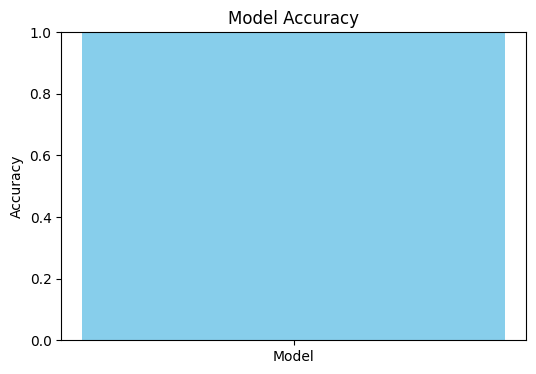

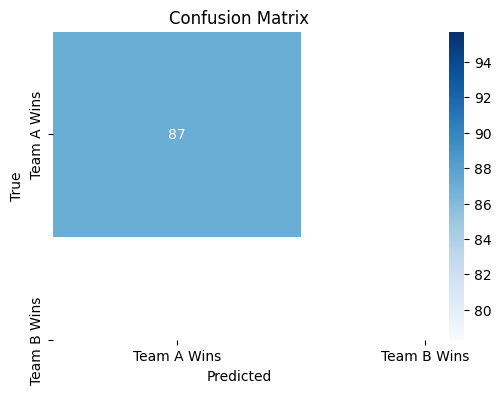

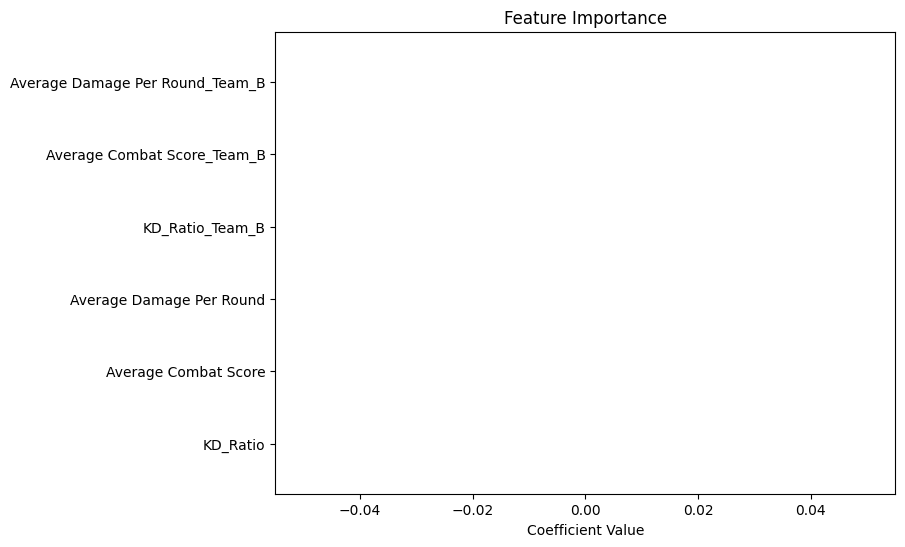

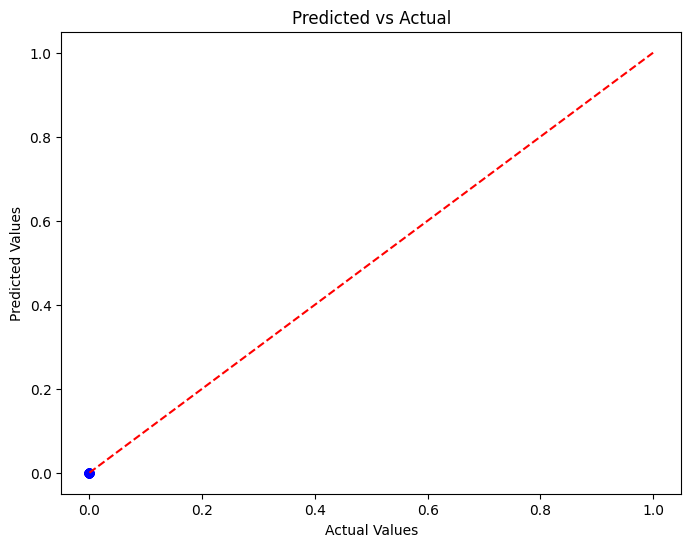

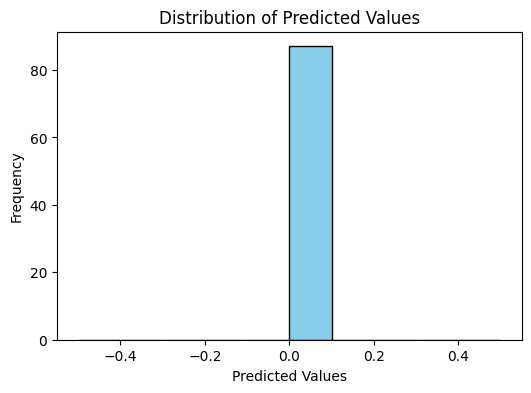

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load datasets
playerstats = pd.read_csv('C:/PROJECTS/FinalProject_DataScience/valorant_data/vct_2024/players_stats/players_stats.csv')
scores = pd.read_csv('C:/PROJECTS/FinalProject_DataScience/valorant_data/vct_2024/matches/scores.csv')

# Data Cleaning: Ensure 'Kills:Deaths' column is treated as string, then extract Kills and Deaths
playerstats['Kills:Deaths'] = playerstats['Kills:Deaths'].astype(str)  # Convert to string
playerstats['Kills'] = playerstats['Kills:Deaths'].str.split(':').str[0].astype(float)
playerstats['Deaths'] = playerstats['Kills:Deaths'].str.split(':').str[1].astype(float)
playerstats['KD_Ratio'] = playerstats['Kills'] / playerstats['Deaths']

# Convert Average Combat Score and Average Damage Per Round to float (if necessary)
playerstats['Average Combat Score'] = playerstats['Average Combat Score'].astype(float)
playerstats['Average Damage Per Round'] = playerstats['Average Damage Per Round'].astype(float)

# Aggregate player stats by teams in each match
team_stats = playerstats.groupby(['Tournament', 'Stage', 'Match Type', 'Teams']).agg({
    'KD_Ratio': 'mean',
    'Average Combat Score': 'mean',
    'Average Damage Per Round': 'mean'
}).reset_index()

# Merge team stats with match scores
merged_data = pd.merge(scores, team_stats, left_on=['Tournament', 'Stage', 'Match Type', 'Team A'],
                       right_on=['Tournament', 'Stage', 'Match Type', 'Teams'], suffixes=('', '_Team_A'))
merged_data = pd.merge(merged_data, team_stats, left_on=['Tournament', 'Stage', 'Match Type', 'Team B'],
                       right_on=['Tournament', 'Stage', 'Match Type', 'Teams'], suffixes=('', '_Team_B'))

# Check the column names in merged_data
print("Columns in merged_data:", merged_data.columns)

# After printing, adjust the feature selection based on the actual column names

# Prepare features and target based on the correct column names
X = merged_data[['KD_Ratio', 'Average Combat Score', 'Average Damage Per Round',
                 'KD_Ratio_Team_B', 'Average Combat Score_Team_B', 'Average Damage Per Round_Team_B']]

# Match Result: 1 if Team A wins, else 0
y = (merged_data['Match Result'] == 'Team A').astype(int)

# Fill missing values with the mean of each column
X = X.fillna(0)

# Proceed with the rest of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("\nFeature Importance:\n", feature_importance)

# Model Accuracy plot
plt.figure(figsize=(6, 4))
plt.bar(['Model'], [accuracy], color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.show()

# Confusion Matrix plot
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Team A Wins', 'Team B Wins'], yticklabels=['Team A Wins', 'Team B Wins'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature Importance plot
plt.figure(figsize=(8, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()

# Predicted vs Actual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_binary, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual')
plt.show()

# Histogram of predictions
plt.figure(figsize=(6, 4))
plt.hist(y_pred, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()


C:\Users\Jeecoo\AppData\Local\Temp\ipykernel_32108\2754303537.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerstats_cleaned['Cluster'] = dbscan.fit_predict(df_scaled)


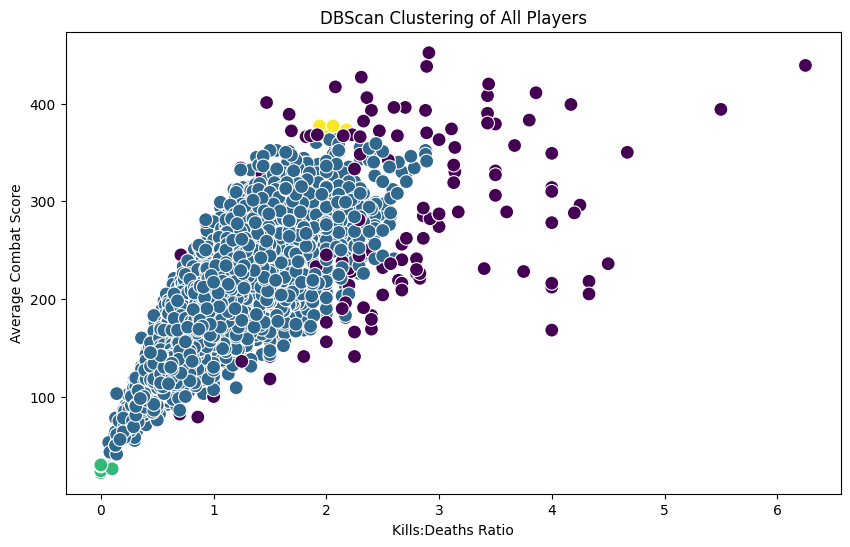

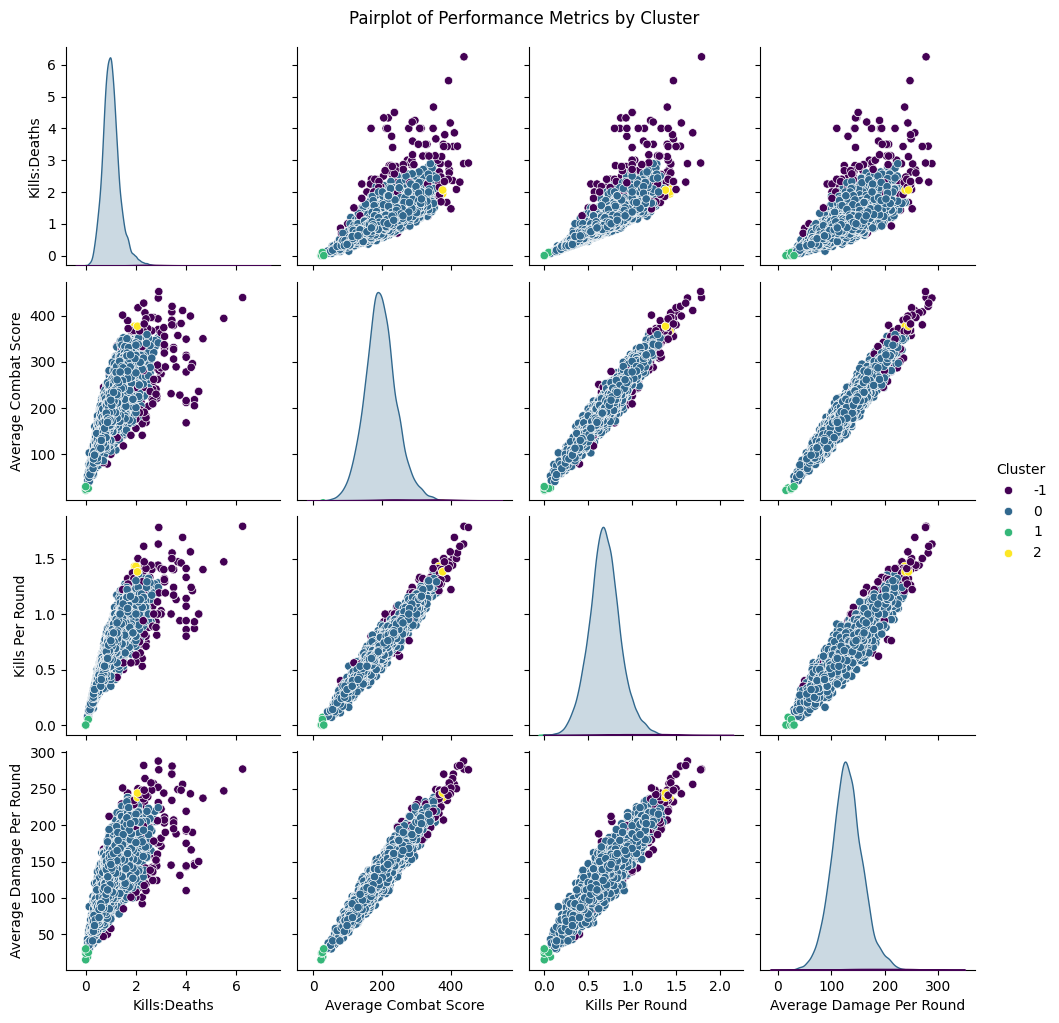

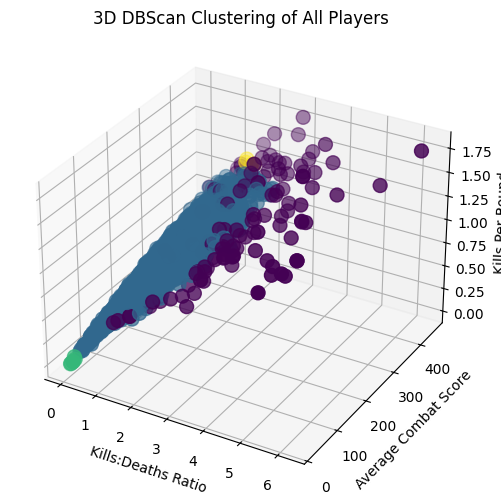

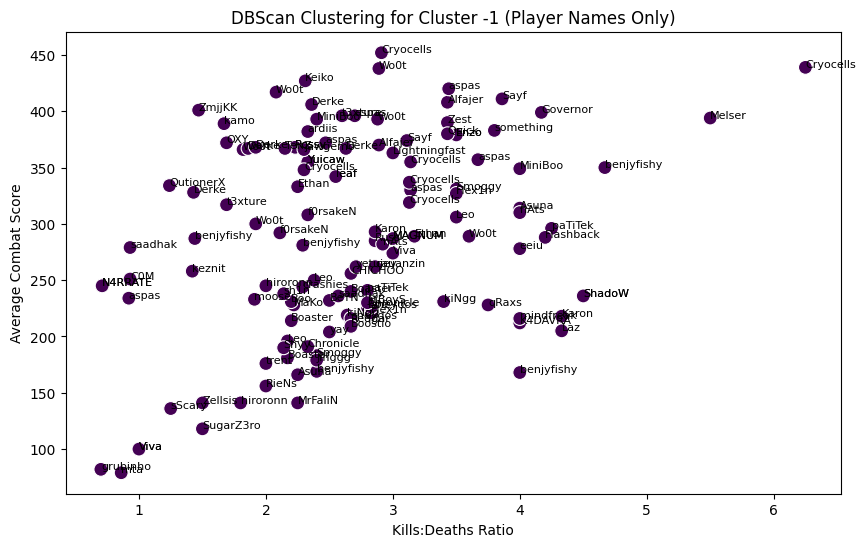

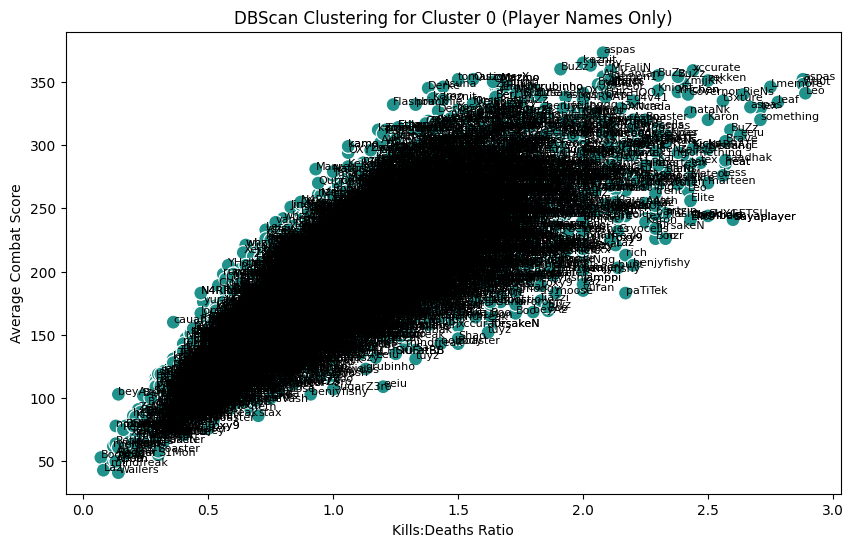

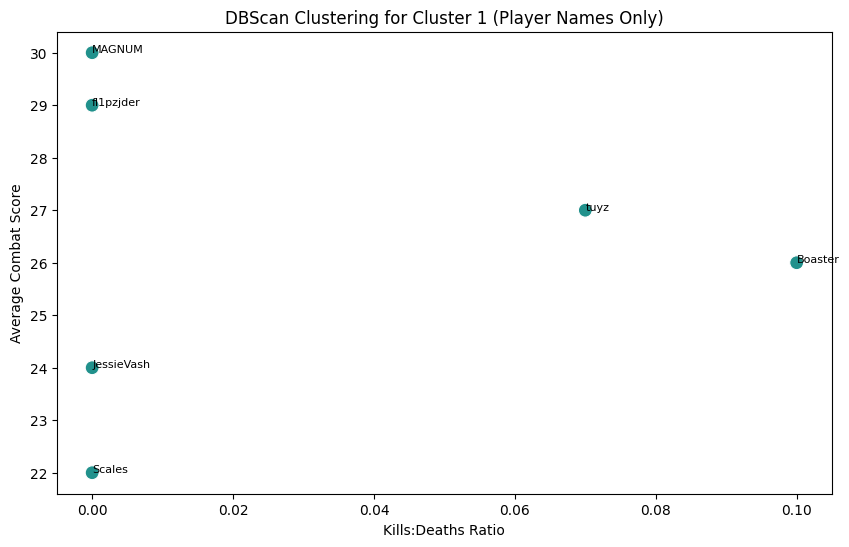

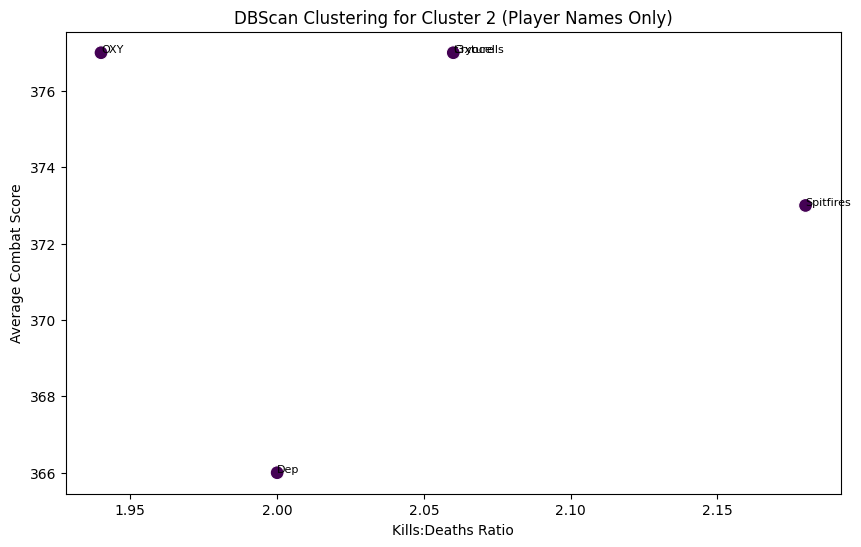


Cluster -1 Summary:
  This cluster contains outliers (noise).

Cluster 0 Summary:
  - Average Kills Per Round: 0.68
  - Average Combat Score: 195.24
  - Average Kills:Deaths: 1.01

Cluster 1 Summary:
  - Average Kills Per Round: 0.02
  - Average Combat Score: 26.33
  - Average Kills:Deaths: 0.03

Cluster 2 Summary:
  - Average Kills Per Round: 1.41
  - Average Combat Score: 374.00
  - Average Kills:Deaths: 2.05


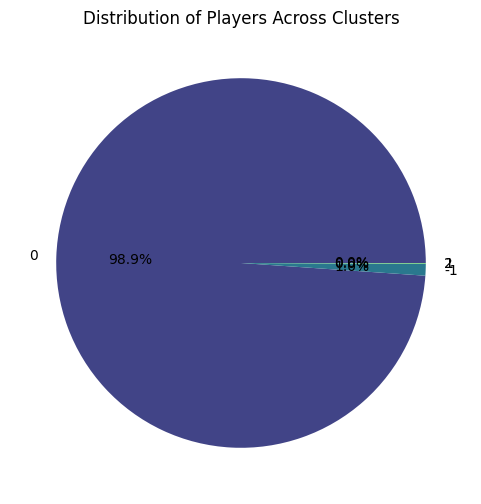

C:\Users\Jeecoo\AppData\Local\Temp\ipykernel_32108\2754303537.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=playerstats_cleaned, x='Cluster', y='Kills Per Round', palette='viridis')


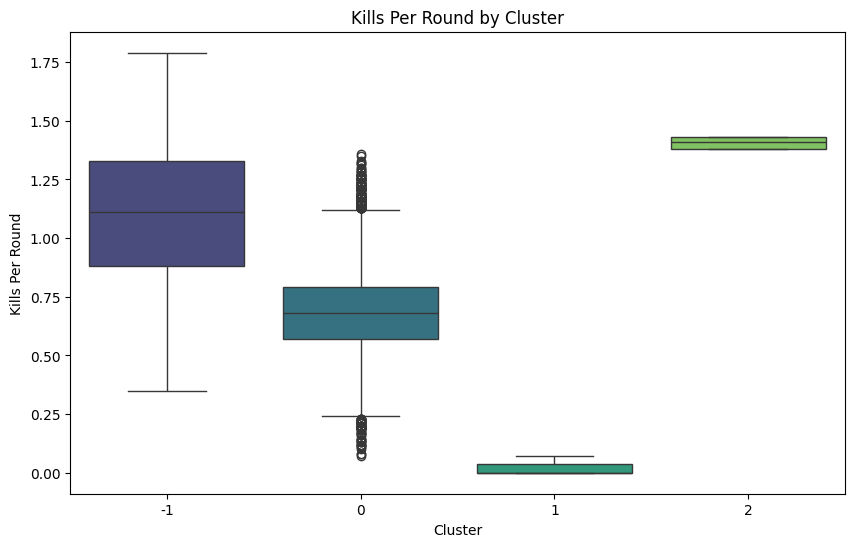

C:\Users\Jeecoo\AppData\Local\Temp\ipykernel_32108\2754303537.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=playerstats_cleaned, x='Cluster', y='Average Combat Score', palette='viridis')


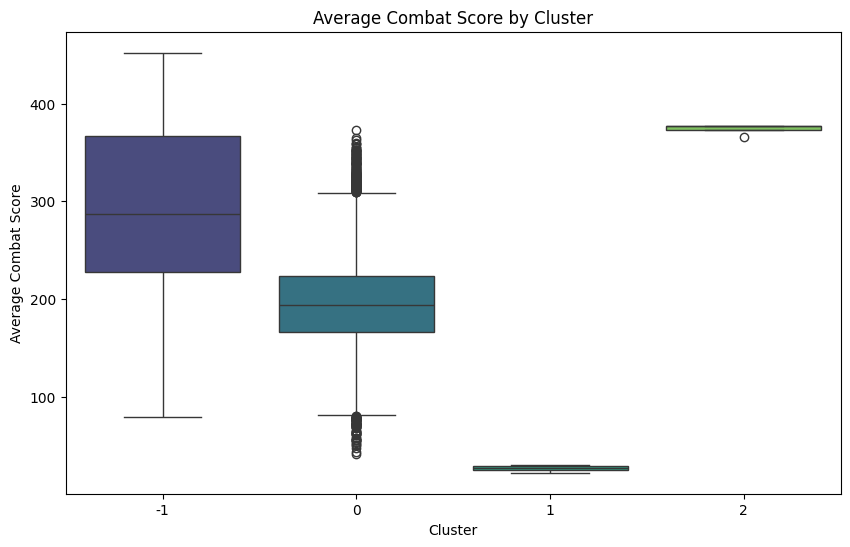

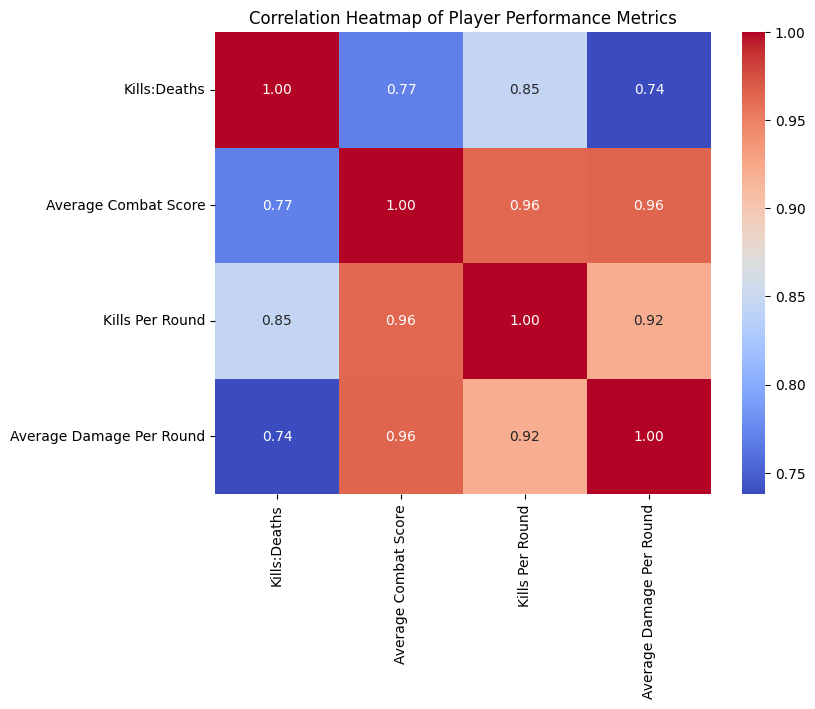

In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
playerstats = pd.read_csv('C:/PROJECTS/FinalProject_DataScience/valorant_data/vct_2024/players_stats/players_stats.csv')

# Select relevant performance-related columns
performance_columns = ['Kills:Deaths', 'Average Combat Score', 'Kills Per Round', 'Average Damage Per Round']

# Check for missing values and clean if necessary
playerstats_cleaned = playerstats.dropna(subset=performance_columns)

# Normalize the data for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(playerstats_cleaned[performance_columns])

# Apply DBScan clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
playerstats_cleaned['Cluster'] = dbscan.fit_predict(df_scaled)

# Visualize the overall DBScan clustering of all players with multiple features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=playerstats_cleaned['Kills:Deaths'], y=playerstats_cleaned['Average Combat Score'],
                hue=playerstats_cleaned['Cluster'], palette='viridis', s=100, legend=None)
plt.title('DBScan Clustering of All Players')
plt.xlabel('Kills:Deaths Ratio')
plt.ylabel('Average Combat Score')
plt.show()

# Pairplot to visualize relationships across all features
sns.pairplot(playerstats_cleaned, vars=performance_columns, hue="Cluster", palette="viridis")
plt.suptitle("Pairplot of Performance Metrics by Cluster", y=1.02)
plt.show()

# 3D Scatter Plot for better visualization
fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3 features: Kills:Deaths, Average Combat Score, Kills Per Round
ax.scatter(playerstats_cleaned['Kills:Deaths'], playerstats_cleaned['Average Combat Score'],
           playerstats_cleaned['Kills Per Round'], c=playerstats_cleaned['Cluster'], cmap='viridis', s=100)

ax.set_xlabel('Kills:Deaths Ratio')
ax.set_ylabel('Average Combat Score')
ax.set_zlabel('Kills Per Round')
ax.set_title('3D DBScan Clustering of All Players')
plt.show()

# Function to plot player names for specific clusters
def plot_cluster_data(cluster_label):
    cluster_data = playerstats_cleaned[playerstats_cleaned['Cluster'] == cluster_label]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=cluster_data['Kills:Deaths'], y=cluster_data['Average Combat Score'], 
                    s=100, hue=cluster_data['Cluster'], palette='viridis', legend=None)
    for i in range(len(cluster_data)):
        plt.text(cluster_data['Kills:Deaths'].iloc[i], cluster_data['Average Combat Score'].iloc[i],
                 cluster_data['Player'].iloc[i], fontsize=8)
    plt.title(f'DBScan Clustering for Cluster {cluster_label} (Player Names Only)')
    plt.xlabel('Kills:Deaths Ratio')
    plt.ylabel('Average Combat Score')
    plt.show()

# Plot for outliers (Cluster -1)
plot_cluster_data(-1)

# Plot for Cluster 0
plot_cluster_data(0)

# Plot for Cluster 1
plot_cluster_data(1)

# Plot for Cluster 2
plot_cluster_data(2)

# Cluster Profile Summary
for cluster_label, stats in playerstats_cleaned.groupby('Cluster')[performance_columns].mean().iterrows():
    print(f"\nCluster {cluster_label} Summary:")
    if cluster_label == -1:
        print("  This cluster contains outliers (noise).")
    else:
        print(f"  - Average Kills Per Round: {stats['Kills Per Round']:.2f}")
        print(f"  - Average Combat Score: {stats['Average Combat Score']:.2f}")
        print(f"  - Average Kills:Deaths: {stats['Kills:Deaths']:.2f}")

# Pie chart showing the distribution of players across clusters
cluster_distribution = playerstats_cleaned['Cluster'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(cluster_distribution, labels=cluster_distribution.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(cluster_distribution)))
plt.title('Distribution of Players Across Clusters')
plt.show()

# Box plots to compare performance metrics by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=playerstats_cleaned, x='Cluster', y='Kills Per Round', palette='viridis')
plt.title('Kills Per Round by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Kills Per Round')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=playerstats_cleaned, x='Cluster', y='Average Combat Score', palette='viridis')
plt.title('Average Combat Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Combat Score')
plt.show()

# Optional: Correlation heatmap of performance metrics
correlation_matrix = playerstats_cleaned[performance_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Player Performance Metrics')
plt.show()


C:\Users\Jeecoo\AppData\Local\Temp\ipykernel_32108\1010376095.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerstats_cleaned['Cluster'] = dbscan.fit_predict(df_scaled)


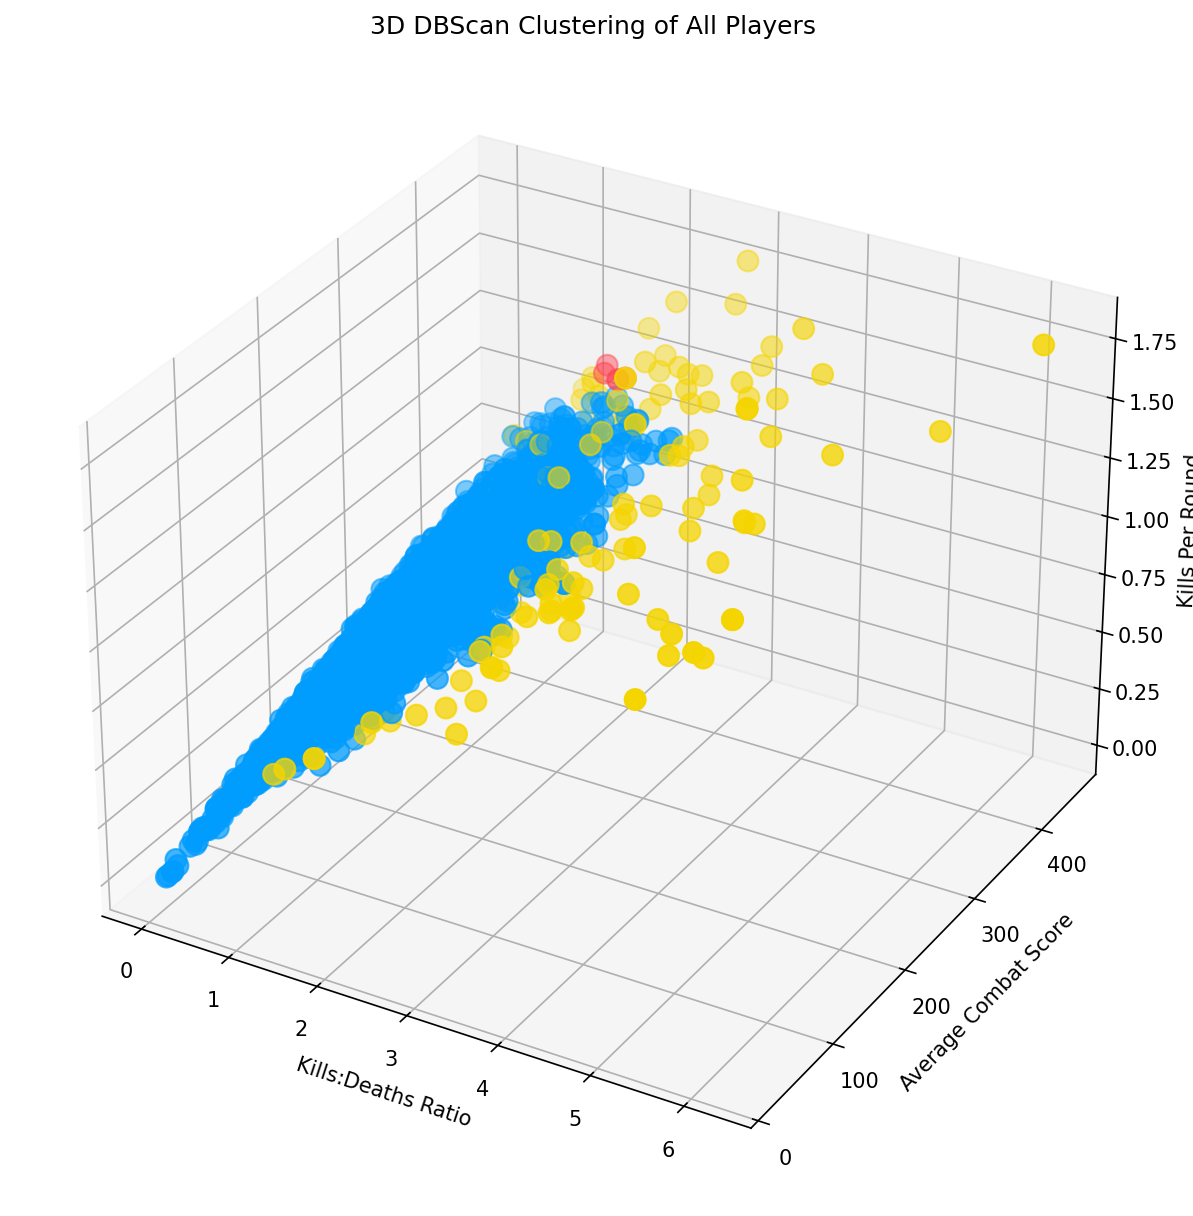

Player Names in Cluster 2:
          Player  Kills:Deaths  Average Combat Score  Kills Per Round
1959         OXY          1.94                   377             1.43
3751   Spitfires          2.18                   373             1.41
4864         Dep          2.00                   366             1.43
9800   Cryocells          2.06                   377             1.38
14016    t3xture          2.06                   377             1.38
Player Names in Cluster -1:
           Player  Kills:Deaths  Average Combat Score  Kills Per Round
4      benjyfishy          2.40                   169             0.75
7            Wo0t          3.60                   289             1.13
167         aspas          0.92                   234             0.65
238       Alfajer          3.43                   408             1.50
267          BeYN          2.50                   232             0.94
...           ...           ...                   ...              ...
14528  benjyfishy          2

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
playerstats = pd.read_csv('C:/PROJECTS/FinalProject_DataScience/valorant_data/vct_2024/players_stats/players_stats.csv')

# Select relevant performance-related columns
performance_columns = ['Kills:Deaths', 'Average Combat Score', 'Kills Per Round', 'Average Damage Per Round']

# Check for missing values and clean if necessary
playerstats_cleaned = playerstats.dropna(subset=performance_columns)

# Normalize the data for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(playerstats_cleaned[performance_columns])

# Apply DBScan clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
playerstats_cleaned['Cluster'] = dbscan.fit_predict(df_scaled)

# Define Valorant's branding colors
valorant_colors = {
    'top_performing': '#FF4655',  # Red
    'blue_cluster': '#00A3E0',    # Blue
    'outlier': '#F5D500'          # Yellow
}

# 3D Scatter Plot for better visualization
fig = plt.figure(figsize=(14, 10), dpi=150)
ax = fig.add_subplot(111, projection='3d')

# Color the clusters based on Valorant branding colors
colors = playerstats_cleaned['Cluster'].map(lambda x: valorant_colors['top_performing'] if x == 2 else
                                              (valorant_colors['outlier'] if x == -1 else valorant_colors['blue_cluster']))

# Scatter plot for 3 features: Kills:Deaths, Average Combat Score, Kills Per Round
scatter = ax.scatter(playerstats_cleaned['Kills:Deaths'], playerstats_cleaned['Average Combat Score'],
           playerstats_cleaned['Kills Per Round'], c=colors, s=100)

ax.set_xlabel('Kills:Deaths Ratio')
ax.set_ylabel('Average Combat Score')
ax.set_zlabel('Kills Per Round')
ax.set_title('3D DBScan Clustering of All Players')

plt.show()

# Function to identify and print player names for specific clusters
def identify_cluster_players(cluster_label):
    cluster_data = playerstats_cleaned[playerstats_cleaned['Cluster'] == cluster_label]
    if cluster_data.empty:
        print(f"No players found in Cluster {cluster_label}")
    else:
        print(f"Player Names in Cluster {cluster_label}:")
        print(cluster_data[['Player', 'Kills:Deaths', 'Average Combat Score', 'Kills Per Round']])

# Identify top-performing cluster (green points, assumed Cluster 2)
identify_cluster_players(2)  # Top-performing cluster, adjust this number if needed

# Identify outliers (yellow points, Cluster -1)
identify_cluster_players(-1)  # Outliers


C:\Users\Jeecoo\AppData\Local\Temp\ipykernel_32108\539917968.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerstats_cleaned['Cluster'] = dbscan.fit_predict(df_scaled_3d)


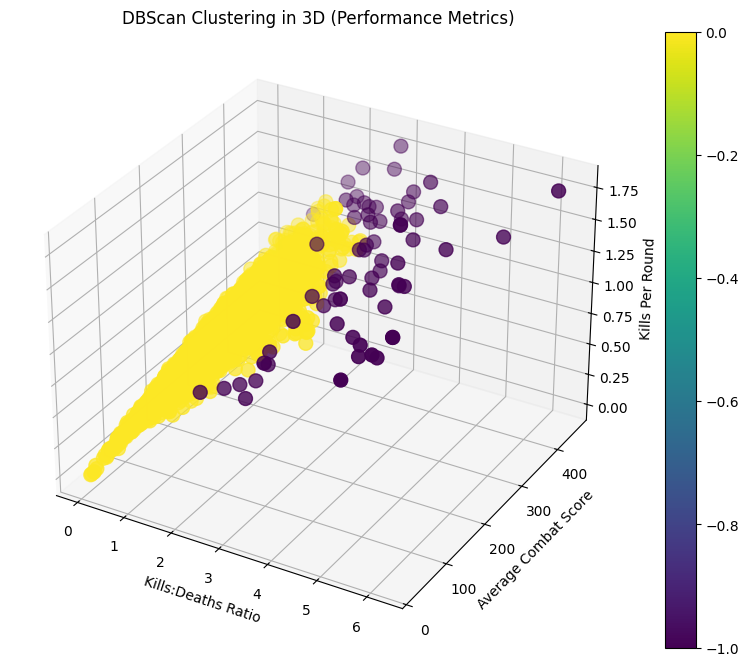

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# Select three performance metrics for the 3D plot
performance_columns_3d = ['Kills:Deaths', 'Average Combat Score', 'Kills Per Round']

# Normalize the data
df_scaled_3d = scaler.fit_transform(playerstats_cleaned[performance_columns_3d])

# Apply DBScan clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
playerstats_cleaned['Cluster'] = dbscan.fit_predict(df_scaled_3d)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points, colored by the cluster they belong to
scatter = ax.scatter(playerstats_cleaned['Kills:Deaths'], playerstats_cleaned['Average Combat Score'], 
                     playerstats_cleaned['Kills Per Round'], c=playerstats_cleaned['Cluster'], cmap='viridis', s=100)

# Add labels and title
ax.set_xlabel('Kills:Deaths Ratio')
ax.set_ylabel('Average Combat Score')
ax.set_zlabel('Kills Per Round')
ax.set_title('DBScan Clustering in 3D (Performance Metrics)')

# Add color bar for cluster labels
plt.colorbar(scatter)

plt.show()


C:\Users\Jeecoo\AppData\Local\Temp\ipykernel_32108\1936023389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerstats_cleaned['Cluster'] = dbscan.fit_predict(df_scaled)


Anomalous Players (Outliers or Extreme Values):
          Player  Kills Per Round  Clutch Success %  Cluster
411       Melser             1.47              67.0       -1
659        Lakia             0.18              50.0       -1
753        kiNgg             0.26             100.0       -1
1361       aspas             1.47              33.0       -1
1864         C0M             0.26             100.0       -1
...          ...              ...               ...      ...
14850     runneR             0.76              75.0        0
14917     ardiis             0.75             100.0        1
14941  Chronicle             0.83             100.0        1
14958      Brave             0.64              75.0        0
14966  QutionerX             0.76             100.0        1

[769 rows x 4 columns]


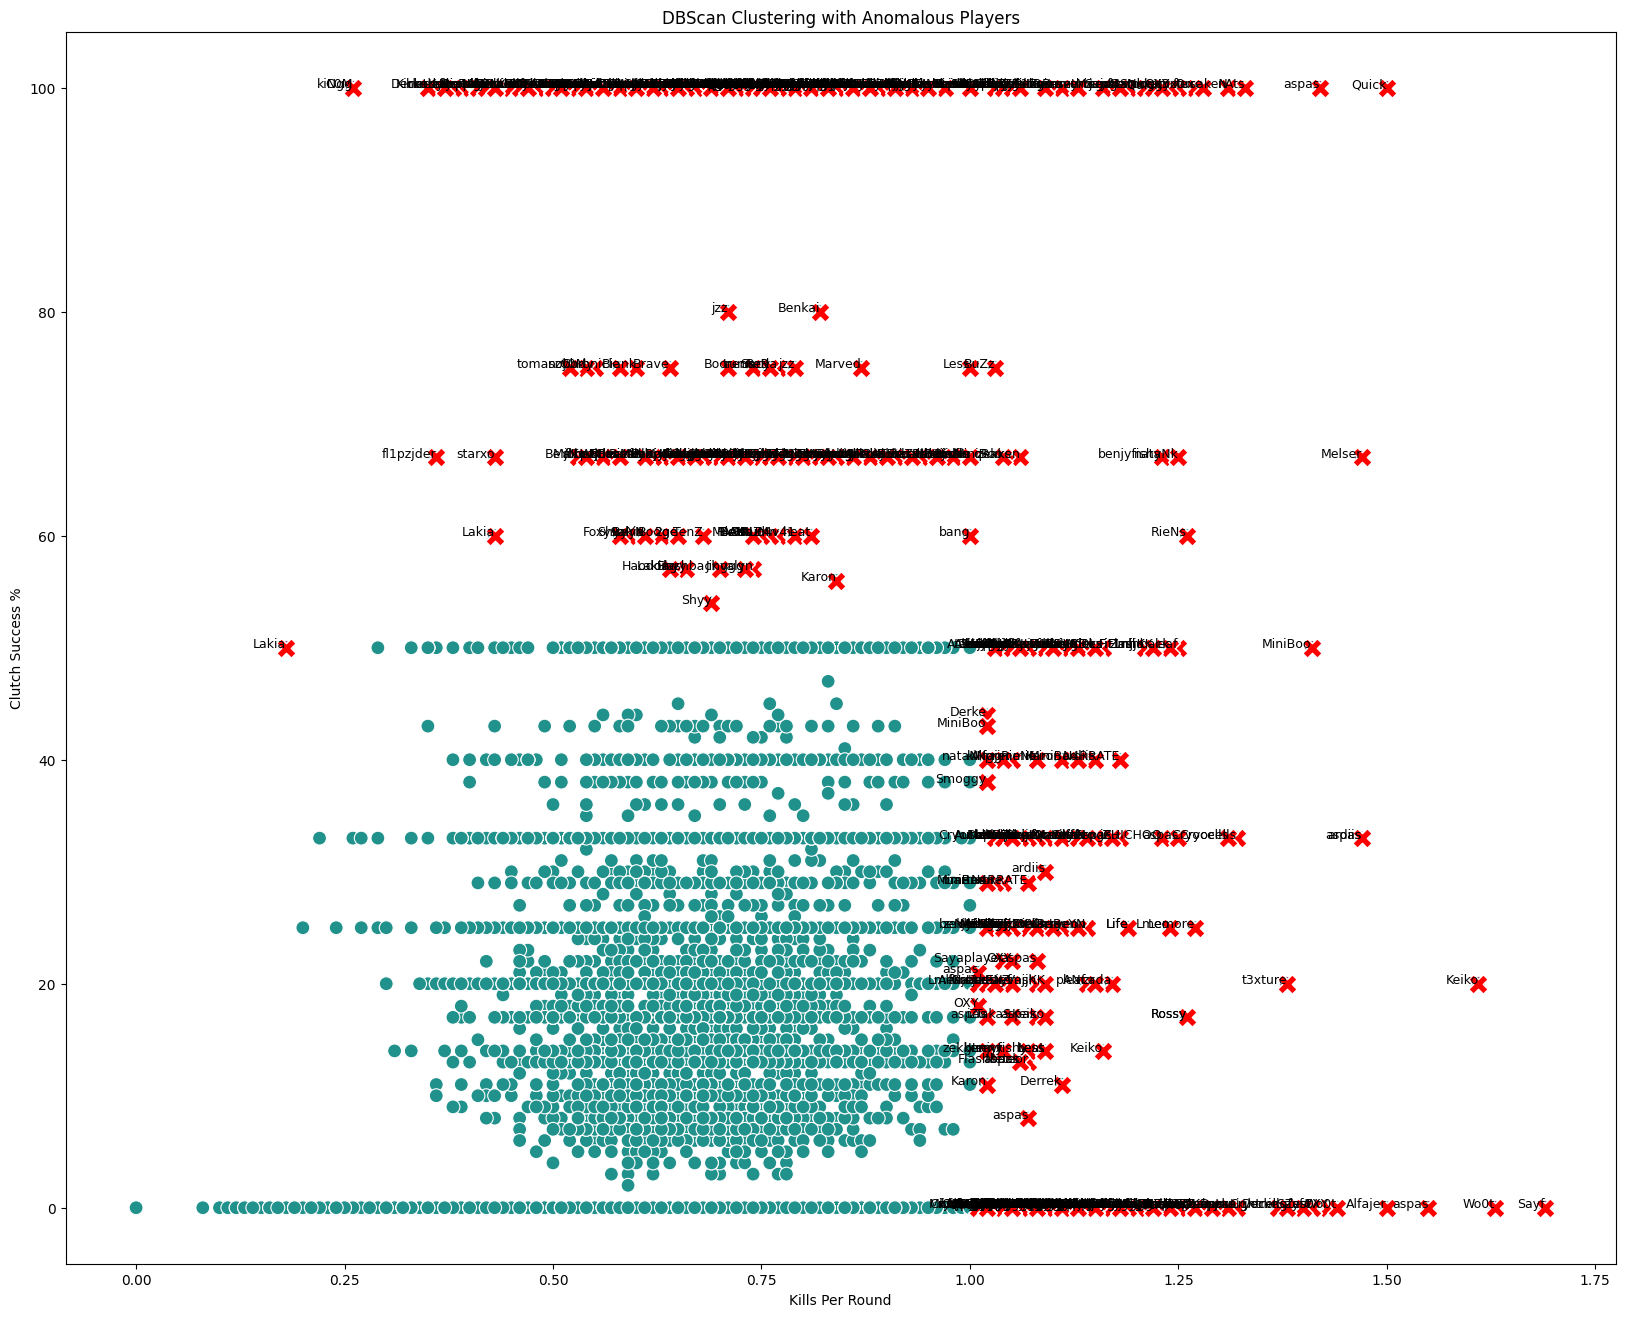

In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
playerstats = pd.read_csv('C:/PROJECTS/FinalProject_DataScience/valorant_data/vct_2024/players_stats/players_stats.csv')

# Select relevant performance metrics
performance_columns = ['Kills Per Round', 'Clutch Success %']

# Check for missing values and clean data
# Convert 'Clutch Success %' to numeric (removing '%' and converting to float)
playerstats['Clutch Success %'] = playerstats['Clutch Success %'].replace('%', '', regex=True).astype(float)

# Drop rows with missing values in relevant columns
playerstats_cleaned = playerstats.dropna(subset=performance_columns)

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(playerstats_cleaned[performance_columns])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
playerstats_cleaned['Cluster'] = dbscan.fit_predict(df_scaled)

# Identify outliers (anomalies)
outliers = playerstats_cleaned[playerstats_cleaned['Cluster'] == -1]

# Find players with exceptionally high "Kills Per Round" or "Clutch Success %"
high_kills_per_round = playerstats_cleaned[playerstats_cleaned['Kills Per Round'] > playerstats_cleaned['Kills Per Round'].quantile(0.95)]  # Top 5%
high_clutch_success = playerstats_cleaned[playerstats_cleaned['Clutch Success %'] > playerstats_cleaned['Clutch Success %'].quantile(0.95)]  # Top 5%

# Combine outliers and extreme values
anomalies = pd.concat([outliers, high_kills_per_round, high_clutch_success]).drop_duplicates()

# Print anomalies with player names
print("Anomalous Players (Outliers or Extreme Values):")
print(anomalies[['Player', 'Kills Per Round', 'Clutch Success %', 'Cluster']])

# Optionally: Visualize anomalies in a scatter plot
plt.figure(figsize=(20, 16))

# Plot the clusters
sns.scatterplot(x=playerstats_cleaned['Kills Per Round'], y=playerstats_cleaned['Clutch Success %'], 
                hue=playerstats_cleaned['Cluster'], palette='viridis', s=100, legend=None)

# Highlight anomalies in the plot
sns.scatterplot(x=anomalies['Kills Per Round'], y=anomalies['Clutch Success %'], color='red', s=200, marker='X')

# Annotate the names of the top-tier players or anomalies
for i in range(anomalies.shape[0]):
    plt.text(anomalies.iloc[i]['Kills Per Round'], anomalies.iloc[i]['Clutch Success %'],
             anomalies.iloc[i]['Player'], fontsize=9, ha='right', color='black')

plt.title('DBScan Clustering with Anomalous Players')
plt.xlabel('Kills Per Round')
plt.ylabel('Clutch Success %')
plt.show()


ValueError: could not convert string to float: '22%'